<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 連関の検定

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from statsmodels.stats.proportion import proportions_ztest

## 連関の検定

2つのカテゴリー変数間に連関があるかどうかを検定します。  
[こちら](https://bit.ly/3XF5LnA)の問題を解いていきます。

### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**片側検定（上側）**になります）

帰無仮説$H_0$：「連関がない（独立である）」  
対立仮説$H_1$：「連関がある（独立でない）」

#### ② 帰無仮説のもとで標本観察を行う 

**カイ二乗値**（$\chi^2$）が従う確率分布は **カイ二乗分布**に従います。  
独立の場合はカイ二乗値は$0$になります。



＜例＞ a行b列の分割表  
自由度$=(a-1)(b-1)$

標本のカイ二乗値を求めます。    
また、自由度を定めることで、$\chi^2$分布が一つに決まります。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

②で導出した$\chi^2$値と、有意水準に基づく$\chi^2$値を比較し、  
($p$**値を求めて**) 棄却が必要かどうか決めます。  


### Pythonによる仮説検定

では連関の検定を行っていきましょう。

In [2]:
obs = [[55,22,16,7] , [40,32,24,4]]
chi , p , dof , ex = stats.chi2_contingency(obs,correction=False)

print(f"カイ二乗値は{chi}です")
print(f"p値は{p*100}%です")
print(f"自由度は{dof}です")
print(f"期待度数は{ex}です")

カイ二乗値は6.63845472266525です
p値は8.435923449835014%です
自由度は3です
期待度数は[[47.5 27.  20.   5.5]
 [47.5 27.  20.   5.5]]です


自由度$3$の$\chi^2$分布における有意水準$5$%に対応する値は$7.81$です。

In [3]:
stats.chi2.ppf(0.95, 3)

7.814727903251179

* $\chi^2$値が$7.81$より小さくなった
* $p$値が$5$%より大きくなった

この二点から、帰無仮説$H_0$を棄却することができません。  
よって、対立仮説$H_1$を採択しません。

In [4]:
print("したがって、性別と血液型は独立ではない（関連がある）")

したがって、性別と血液型は独立ではない（関連がある）


#### Pythonによるカイ二乗分布の描画

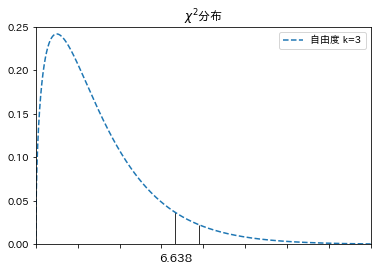

In [5]:
x = np.linspace(0, 20, 10000)
plt.plot(x, stats.chi2.pdf(x, 3), linestyle='--', label='自由度 k={}'.format(3))

"""
****************************************
グラフの書式設定
****************************************
"""
plt.title("$χ^2$分布")   # タイトル
plt.vlines(chi, 0, stats.chi2.pdf(chi, 3),color="black", lw=0.8)
plt.vlines(7.81, 0, stats.chi2.pdf(7.81, 3), color="black", lw=0.8)
plt.text(chi-0.75, -0.02, '6.638', fontsize = 12) 
#plt.text(7.81-0.75, -0.02, '7.81', fontsize = 12)
plt.xticks(color="None") 
plt.xlim(0, 16)       # X軸範囲
plt.ylim(0, 0.25)       # Y軸範囲
plt.legend()         # 凡例
plt.show()

### 補足

#### イェイツの修正

カイ二乗検定に修正を加えたものを**イェイツの修正**といいます。  
ズレを補正するためにたまに用いられるようです。



`stats.chi2_contingency(obs,correction=False)`としたときに、引数`correction`はFalseを指定していました。  
Trueを指定するとイェイツの修正をすることができます。

詳しくは[こちら](https://bit.ly/3xrMTOs)を参照してください。

#### 連関の検定と比率差の検定

比率差の検定は、**連関の検定の自由度1のケース**です。

比率の差の検定の際は、使い勝手がよい  
`statsmodels.stats.proportion.proportions_ztest()`を使うとよいようです。

詳しくは[こちら](https://bit.ly/3lH8orz)を参照してください。